# Visualising MRI data in Python

https://medium.com/@nadavlevi/visualising-mri-data-in-python-fe010c4a1c54

Data taken from https://fastmri.med.nyu.edu

Install h5py:
```python
pip install h5py - https://pypi.org/project/h5py
```

In [1]:
import h5py

file_name = 'singlecoil_test/file1000022.h5'
hf = h5py.File(file_name)

volume_kspace = hf['kspace'][()]
#print(volume_kspace)

middle_index = volume_kspace.shape[0] // 2
slice_kspace = volume_kspace[middle_index] # Choosing the middle slice of this volume
print(volume_kspace.shape)
print(slice_kspace.shape)

(37, 640, 368)
(640, 368)


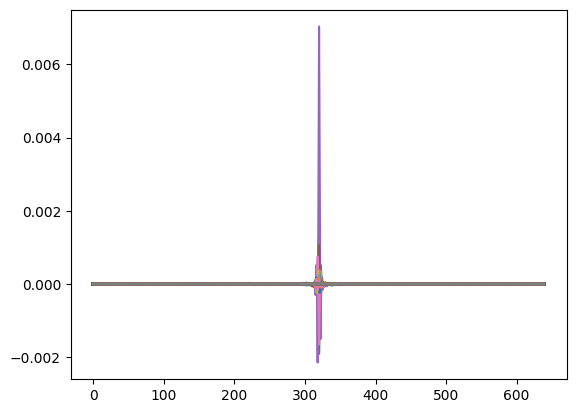

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(slice_kspace)
#plt.yscale('log')
plt.show()

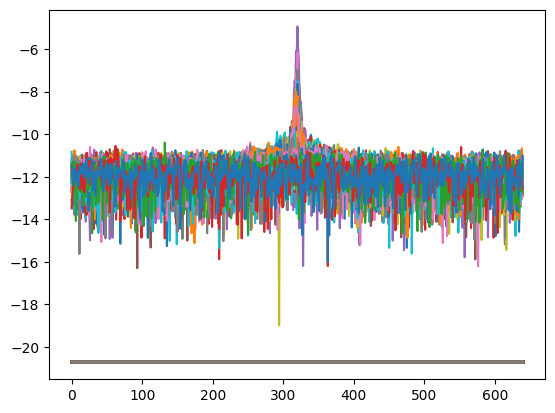

In [6]:
plt.plot(np.log(np.abs(slice_kspace) + 1e-9))
#plt.plot(np.log(np.abs(slice_kspace)))
plt.show()

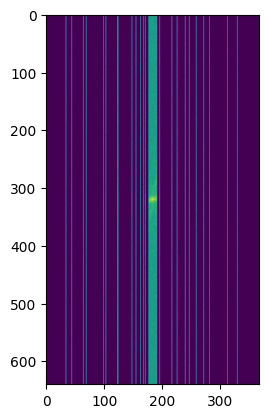

In [7]:
#plt.imshow(np.log(np.abs(slice_kspace)))
plt.imshow(np.log(np.abs(slice_kspace) + 1e-9))
plt.show()

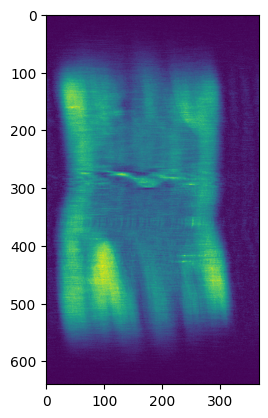

In [10]:
def inverse_fft2_shift(kspace):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(kspace, axes=(-2,-1)), norm='ortho'),axes=(-2,-1))


plt.imshow(np.abs(inverse_fft2_shift(slice_kspace)))
plt.show()

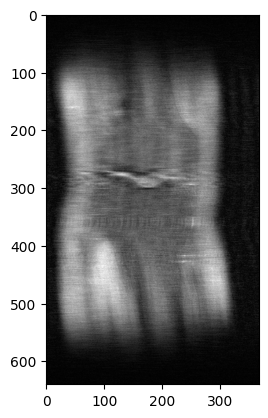

In [11]:
def inverse_fft2_shift(kspace):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(kspace, axes=(-2,-1)), norm='ortho'),axes=(-2,-1))


plt.imshow(np.abs(inverse_fft2_shift(slice_kspace)), cmap=plt.cm.gray)
plt.show()

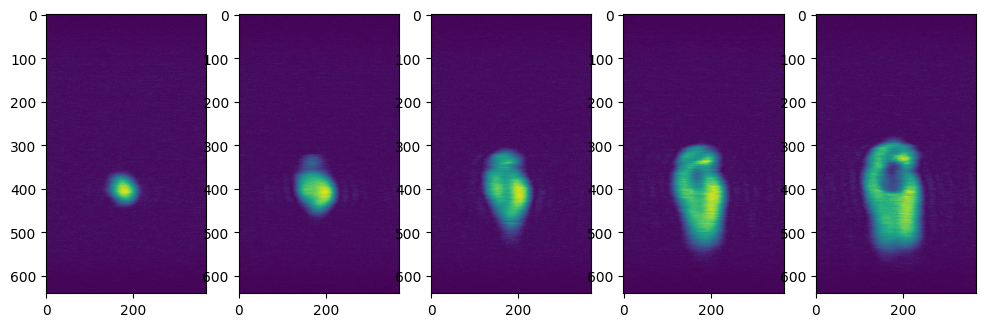

In [13]:
slices = [0, 1, 2, 3, 4]
fig = plt.figure(figsize=(12, 6))
for i, num in enumerate(slices):
    plt.subplot(1, len(slices), i + 1)
    plt.imshow(np.abs(inverse_fft2_shift(volume_kspace[num])))